In [2]:
!pip install qiskit
!pip install qiskit_ibm_runtime
!pip install pylatexenc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.8/340.8 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/13

In [9]:
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 80.4 MB/s eta 0:00:00


In [3]:
from qiskit.quantum_info import Operator
from qiskit import QuantumCircuit
import numpy as np

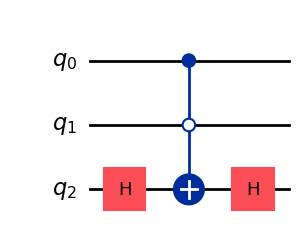

In [4]:
n=3
qc = QuantumCircuit(n)
qc.h(n-1)
qc.mcx([0,1],2,ctrl_state='01')
qc.h(n-1)
qc.draw('mpl')

In [5]:
def phase_oracle(name = 'Uf'):
    qc = QuantumCircuit(3, name=name)
    qc.h(n-1)
    qc.mcx([0,1],2,ctrl_state='01')
    qc.h(n-1)
    return qc

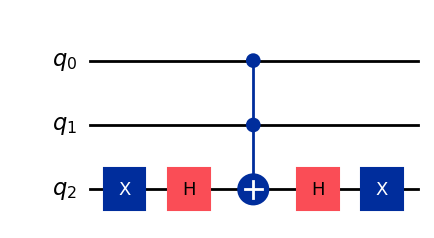

In [6]:
n=3
qc = QuantumCircuit(n)
qc.x(n-1)
qc.h(n-1)
qc.mcx([0,1],2,ctrl_state='11')
qc.h(n-1)
qc.x(n-1)
qc.draw('mpl')

In [7]:
def diffuser(name='V'):
    n=3
    qc = QuantumCircuit(n, name=name)
    qc.h(range(n))
    qc.x(n-1)
    qc.h(n-1)
    qc.mcx([0,1],2,ctrl_state='00')
    qc.h(n-1)
    qc.x(n-1)
    qc.h(range(n))
    return qc

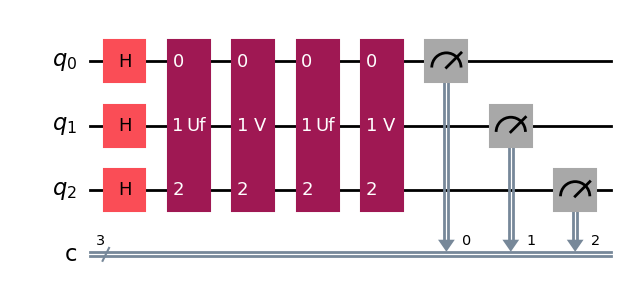

In [ ]:
n=3
gr = QuantumCircuit(n, n)
nsol=1 #number of solutions
alpha=np.arcsin(np.sqrt(nsol/2**(n))) # Determine alpha
r = round(np.pi/(4*alpha)-0.5) # Determine r

gr.h(range(n))    # step 1: apply Hadamard gates on all working qubits


# step 2: apply r rounds of the phase oracle and the diffuser
for j in range(r):
    #phase_oracle(gr,n)
    #diffuser(gr,n)
    gr.append(phase_oracle(), range(n))
    gr.append(diffuser(), range(n))

gr.measure(range(n), range(n))    # step 3: measure all qubits

gr.draw('mpl')

PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=1000, num_bits=3>)), metadata={'shots': 1000, 'circuit_metadata': {}})], metadata={'version': 2})


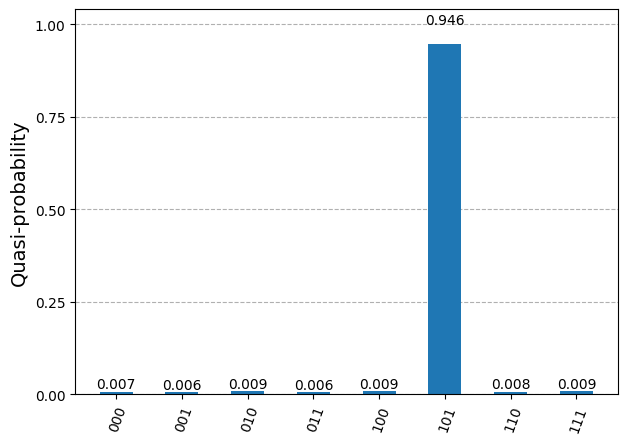

In [19]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import AerSimulator
from qiskit import transpile
simulator_aer=AerSimulator()
gr_trsp = transpile(gr, simulator_aer)
sampler_aer = Sampler(simulator_aer)
job = sampler_aer.run([(gr_trsp, None,1000)])
result =  job.result()
print(result)
counts = result[0].data.c.get_counts()
from qiskit.visualization import plot_histogram, plot_distribution

plot_distribution(counts)

In [15]:
# PUBs on IBM quantum computers
from qiskit import transpile
from qiskit_ibm_runtime import SamplerV2, QiskitRuntimeService

ibm_service = QiskitRuntimeService(channel = "ibm_quantum", token = "75f57ef75d380faf73b8d1312d45344faf6ec8fd050d5be9901ffe1dd3bd7c4a917c5f8178804debc8a2f30f19775352a6832d8cba2e39747ccca99a9fc7e42b")


In [16]:
ibm_qcomp = ibm_service.backend("ibm_kyiv")
sampler_ibm = SamplerV2(mode=ibm_qcomp)

qc_tr_ibm = transpile(gr, backend = ibm_qcomp)

job_ibm = sampler_ibm.run([(qc_tr_ibm,None,1000)]) #PUB = (circuit, paramters, shots)
print(job_ibm.job_id())

cyyxxex4raf0008f7ypg


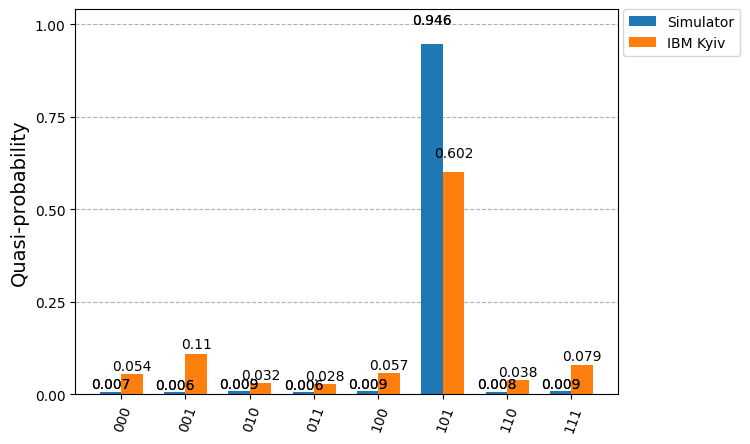

In [20]:

job = ibm_service.job('cyyxxex4raf0008f7ypg')
result = job.result()
counts_ibm = result[0].data.c.get_counts()
from qiskit.visualization import plot_histogram, plot_distribution

plot_distribution([counts,counts_ibm], legend = ['Simulator', 'IBM Kyiv'])